## apyori (어프라이어리)
- `빈발 항목 집합` : 최소 지지도 이상인 항목 집합
- 모든 항목 집합에 대한 **복잡한 계산량** 을 줄이기 위해 최소 지지도를 정하고 그 이상의 값만 찾아 연관 규칙을 생성
    - 장점 : 원리가 간단함
    - 단점 : 데이터가 클수록 속도가 느려지고 연산량이 많아짐

In [ ]:
# !pip install apyori

- `apriori(transactions, **kwargs)`
    - transactions : 리스트 형태의 transaction 데이터 입력
    - **kwargs : min_support, min_confidence, min_lift, max_length, etc.
    - 출력 : RelatyionRecord 객체에 규칙을 저장

In [1]:
# apyori 라이브러리를 읽어 들인다.
import apyori as ap

In [2]:
# 청년마트 T 자료를 입력한다.
T = [['우유','계란','커피'],
      ['빵','우유','버터','휴지','라면'],
      ['맥주', '땅콩'],
      ['계란','빵','우유','생수'],
      ['햇반','커피','간장','계란']]

### apriori 실행

In [3]:
# 청년마트 T에서 최소 지지도 0.3, 최소 신뢰도 0.7을 충족하는
#         연관 규칙 rules을 생성하고 출력한다.
#         ap.apriori ( transactions, **kwarg)

rules = ap.apriori(T, min_support= 0.3, min_confidence = 0.7)
print(rules)
print(T)

<generator object apriori at 0x104b9c300>
[['우유', '계란', '커피'], ['빵', '우유', '버터', '휴지', '라면'], ['맥주', '땅콩'], ['계란', '빵', '우유', '생수'], ['햇반', '커피', '간장', '계란']]


- rules가 generator로 만들어짐
### print rules

In [4]:
# rules를 한 줄씩 출력한다.

for rule in rules :
  print(rule)

RelationRecord(items=frozenset({'계란', '커피'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'커피'}), items_add=frozenset({'계란'}), confidence=1.0, lift=1.6666666666666667)])
RelationRecord(items=frozenset({'우유', '빵'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'빵'}), items_add=frozenset({'우유'}), confidence=1.0, lift=1.6666666666666667)])


### rule을 list로 저장

In [5]:
# 위에서 생성된 객체를 살펴보기 위해서 Rules_lst에 저장한다.
# rules는 generator 였다.  한 번 생성되고 한 번 순회 iterate 하면
# 객체는 비어있는 상태가 된다.
# 규칙 rules를 계속 참조하기 위해 list로 저장하자.

# list에 저장하기 위해서는 비어진 apriori  함수를 재실행 해야 하고,
# 리스트에 저장한다.

rules = ap.apriori (T, min_support= 0.3, min_confidence = 0.7)
rules_lst = list(rules)

In [6]:
# 2.1.6.2 리스트에 저장된 첫 규칙을 출력한다.
print(rules_lst[0])

RelationRecord(items=frozenset({'계란', '커피'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset({'커피'}), items_add=frozenset({'계란'}), confidence=1.0, lift=1.6666666666666667)])


### 연관규칙 구조 이해

In [8]:
# (Relation의 구조)
'''
RelationRecord(
    items=frozenset({'커피', '계란'}),
    support=0.4,
    ordered_statistics=
     [
         OrderedStatistic(
             items_base=frozenset({'커피'}),
             items_add=frozenset({'계란'}),
             confidence=1.0,
             lift=1.6666666666666667)]
)
'''

"\nRelationRecord(\n    items=frozenset({'커피', '계란'}),\n    support=0.4,\n    ordered_statistics=\n     [\n         OrderedStatistic(\n             items_base=frozenset({'커피'}),\n             items_add=frozenset({'계란'}),\n             confidence=1.0,\n             lift=1.6666666666666667)]\n)\n"

### 연관규칙 출력함수 정의
* RelationRecord 형태로는 이해가 어렵다.
* 아래 예시 처럼 이해 하기 쉬운 형태로 출력하는 함수 print_rr 정의
> {'커피'}=>{'계란'}, support=0.40, confidence=1.00, lift=1.67

In [9]:
# 첫 번째 규칙에서 선행항과 후행항을 출력해보자.
lhs = rules_lst[0][2][0][0]
rhs = rules_lst[0][2][0][1]
print(set(lhs), set(rhs))

{'커피'} {'계란'}


In [10]:
# 첫 번째 규칙에서 지지도, 신뢰도, 리프트를 소수점 2째자리까지 출력해보자.
support = rules_lst[0][1]
confidence = rules_lst[0][2][0][2]
lift = rules_lst[0][2][0][3]

# 소수점 이하 두자리 출력 예) 0.40, 1.00,1.67
print ( f'{support :.2f}, {confidence :.2f}, {lift :.2f}' )

0.40, 1.00, 1.67


In [11]:
# 연관규칙 RelationRecord의 정보를 출력할 수 있는 함수 print_rr를 정의
#  예시 : {'커피'}=>{'계란'}, support=0.40, confidence=1.00, lift=1.67
#  두 번째 규칙 rule_lst {'빵'}=>{'우유'}를 출력한다.

def print_rr(rr) :
  support = rr[1]
  ord_st = list(rr[2])
  if len(ord_st) >=1 :
    for  i in ord_st :
      lhs = set(i[0])
      rhs = set(i[1]) 

      confidence = i[2]
      lift = i[3]
      print (f'{lhs}=>{rhs}, support={support:.2f},',
          f' confidence={confidence:.2f}, lift={lift:.2f} ')

print_rr(rules_lst[1])

{'빵'}=>{'우유'}, support=0.40,  confidence=1.00, lift=1.67 


#### 지지도 0.3, 신뢰도 0.7

In [12]:
# 위에서 정의한 지지도 0.3, 신뢰도 0.7의 규칙을 담고있는
# rules_lst를 for 문과 print_rr을 이용해서 출력한다.

print('min sup : 0.3,  min conf : 0.7')

for rule in rules_lst :
  print_rr(rule)

min sup : 0.3,  min conf : 0.7
{'커피'}=>{'계란'}, support=0.40,  confidence=1.00, lift=1.67 
{'빵'}=>{'우유'}, support=0.40,  confidence=1.00, lift=1.67 


### 다른 지지도, 신뢰도의 규칙 관찰
- 지지도 0.3, 신뢰도 0.6
    - 지지도와 신뢰도를 바꿔가면서 규칙 관찰

In [13]:
# 지지도 0.3, 신뢰도 0.6의 규칙을 생성하고 이를 출력해보자.
# 리스트를 생성할 필요 없이 생성된 규칙 generator를 직접 순회

rules_03_06 = ap.apriori(T, min_support= 0.3, min_confidence = 0.6)

print('min sup : 0.3,  min conf : 0.6')

for rule in rules_03_06 :
  print_rr(rule)

min sup : 0.3,  min conf : 0.6
set()=>{'계란'}, support=0.60,  confidence=0.60, lift=1.00 
set()=>{'우유'}, support=0.60,  confidence=0.60, lift=1.00 
{'계란'}=>{'우유'}, support=0.40,  confidence=0.67, lift=1.11 
{'우유'}=>{'계란'}, support=0.40,  confidence=0.67, lift=1.11 
{'계란'}=>{'커피'}, support=0.40,  confidence=0.67, lift=1.67 
{'커피'}=>{'계란'}, support=0.40,  confidence=1.00, lift=1.67 
{'빵'}=>{'우유'}, support=0.40,  confidence=1.00, lift=1.67 
{'우유'}=>{'빵'}, support=0.40,  confidence=0.67, lift=1.67 


- 지지도 0.2, 신뢰도 0.7

In [14]:
# 지지도 0.2, 신뢰도 0.7의 규칙을 생성하고 이를 출력해보자.
rules_02_07 = ap.apriori(T, min_support= 0.2, min_confidence = 0.7)
print('min sup : 0.2,  min conf : 0.7')
for rule in rules_02_07:
  print_rr(rule)

min sup : 0.2,  min conf : 0.7
{'간장'}=>{'계란'}, support=0.20,  confidence=1.00, lift=1.67 
{'간장'}=>{'커피'}, support=0.20,  confidence=1.00, lift=2.50 
{'간장'}=>{'햇반'}, support=0.20,  confidence=1.00, lift=5.00 
{'햇반'}=>{'간장'}, support=0.20,  confidence=1.00, lift=5.00 
{'생수'}=>{'계란'}, support=0.20,  confidence=1.00, lift=1.67 
{'커피'}=>{'계란'}, support=0.40,  confidence=1.00, lift=1.67 
{'햇반'}=>{'계란'}, support=0.20,  confidence=1.00, lift=1.67 
{'땅콩'}=>{'맥주'}, support=0.20,  confidence=1.00, lift=5.00 
{'맥주'}=>{'땅콩'}, support=0.20,  confidence=1.00, lift=5.00 
{'라면'}=>{'버터'}, support=0.20,  confidence=1.00, lift=5.00 
{'버터'}=>{'라면'}, support=0.20,  confidence=1.00, lift=5.00 
{'라면'}=>{'빵'}, support=0.20,  confidence=1.00, lift=2.50 
{'라면'}=>{'우유'}, support=0.20,  confidence=1.00, lift=1.67 
{'라면'}=>{'휴지'}, support=0.20,  confidence=1.00, lift=5.00 
{'휴지'}=>{'라면'}, support=0.20,  confidence=1.00, lift=5.00 
{'버터'}=>{'빵'}, support=0.20,  confidence=1.00, lift=2.50 
{'버터'}=>{'우유'}, support=0.2

### grocery 데이터 분석하기
- grocery 데이터 적재

In [15]:
# grocery 데이터 적재
# grocery 데이터를 github로 부터 읽어 들이고 내용물을 확인한다.

import pandas as pd

path = '/Users/jun/Library/Mobile Documents/com~apple~CloudDocs/Github/ai _recommendation _system/data/association_data/groceries.csv'
grocery_csv = pd.read_csv(path, header = None)
grocery_csv.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,chicken,tropical fruit,other vegetables,vinegar,shopping bags,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
grocery_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9835 non-null   object
 1   1       7676 non-null   object
 2   2       6033 non-null   object
 3   3       4734 non-null   object
 4   4       3729 non-null   object
 5   5       2874 non-null   object
 6   6       2229 non-null   object
 7   7       1684 non-null   object
 8   8       1246 non-null   object
 9   9       896 non-null    object
 10  10      650 non-null    object
 11  11      468 non-null    object
 12  12      351 non-null    object
 13  13      273 non-null    object
 14  14      196 non-null    object
 15  15      141 non-null    object
 16  16      95 non-null     object
 17  17      66 non-null     object
 18  18      52 non-null     object
 19  19      38 non-null     object
 20  20      29 non-null     object
 21  21      18 non-null     object
 22  22      14 non-null     

### grocery 데이터 가공
- apyori에서 분석 가능한 리스트 형태로 변환

In [17]:
# grocery 데이터 가공
# grocery 데이터를 apyori 라이브러리에서 사용 할 수 있는 형태인
# 리스트 형태로 변환한다.
# DataFramd의 '행'단위 순회 메소드 .iterrows()--> idx, row_series

grocery_list = [ row_series.dropna().to_list()  for idx, row_series in grocery_csv.iterrows()]

# 마지막 3개 리스트 출력
grocery_list[:3]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

### 트랜잭션(거래)과 항목 수 확인

In [18]:
# 전체 거래건수와 항목수를 확인해보자.
# 트랜젝션수

N = len(grocery_list)
N

9835

In [19]:
# 개별 항목수 
k = len(set([item for tr in grocery_list for item in tr]))
k

169

In [20]:
# 출력
print(f'거래 건수 N :{N}, 항목 개수 k: {k}')

거래 건수 N :9835, 항목 개수 k: 169


### apyori 라이브러리와 출력함수 정의

In [21]:
# apyori 라이브러리 준비와 출력함수 print_rr 정의 (수업 내용 복습)
# 라이브러리를 이용해서 가장 지지도가 높은 항목을 찾아보자.
# 라이브러리 설치 및 import.
# RelationRecord 출력을 위한 함수

def print_rr(rr) :
  support = rr[1]
  ord_st = list(rr[2])
  if len(ord_st) >=1 :
    for  i in ord_st :
      lhs = set(i[0])
      rhs = set(i[1])

      confidence = i[2]
      lift = i[3]
      print (f'{lhs}=>{rhs}, support={support:.2f},',
          f' confidence={confidence:.2f}, lift={lift:.2f} ')


In [22]:
# apiori 함수를 이용해서 가장 지지도가 높은 항목을 찾아본다.
# 최소신뢰도를 지정하지 않고 수행하면 지지도에 의해 목록이 결정된다.
#  일단 최소 지지도 0.1로 try

rules = ap.apriori(grocery_list, min_support= 0.1)

# for 문 이용해서 출력
for rule in rules:
  print_rr(rule)

set()=>{'bottled water'}, support=0.11,  confidence=0.11, lift=1.00 
set()=>{'other vegetables'}, support=0.19,  confidence=0.19, lift=1.00 
set()=>{'rolls/buns'}, support=0.18,  confidence=0.18, lift=1.00 
set()=>{'root vegetables'}, support=0.11,  confidence=0.11, lift=1.00 
set()=>{'soda'}, support=0.17,  confidence=0.17, lift=1.00 
set()=>{'tropical fruit'}, support=0.10,  confidence=0.10, lift=1.00 
set()=>{'whole milk'}, support=0.26,  confidence=0.26, lift=1.00 
set()=>{'yogurt'}, support=0.14,  confidence=0.14, lift=1.00 


### 적정 지지도 탐색
- 최소지지도가 1% 이상인 상품(항목) 건수는?

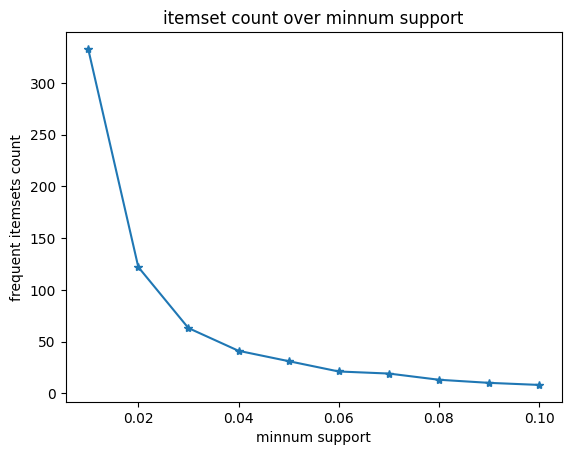

In [23]:
# 적절한 최소지지도를 선정하고 이를 관찰해본다.
# 적절한 지지도의 상품 개수가 되도록 찾아본다.  (0.01 ~ 0.1)

# 라이브러리 import numpy, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# 최소 지지도 출력 범위 (0.01~0.10, 0.01 단위로 )
min_sup_range = np.arange(0.01, 0.11, 0.01)

# min_sup_range 를 최소지지도로 빈발항목 생성 및 개수 세어
# frequent_itemsets_count에 저장
frequent_itemsets_count = []

for ms in min_sup_range:
  f_list = list (ap.apriori(grocery_list, min_support = ms))
  frequent_itemsets_count.append(len(f_list))

# 지지도별 상품 건수 꺾은선 그래프로 출력
plt.plot(min_sup_range, frequent_itemsets_count, marker='*')
plt.title('itemset count over minnum support')
plt.xlabel('minnum support')
plt.ylabel('frequent itemsets count')
plt.show()

- 그래프 분석 : 최소 지지도가 증가할수록 발견되는 빈번한 항목 집합의 수가 감소 (= 더 높은 지지도 기준을 충족하는 항목 집합이 적기 때문)
- 초기에 급격한 감소 : 지지도가 매우 낮은 값에서 시작할 때, 많은 항목 집합이 이 조건을 충족하지만, 지지도를 조금만 높여도 상당수의 항목 집합이 탈락한다.

In [25]:
#[참고] 상기 frequent_itemsets_count의 for문은 다음과 같이 작성 할 수 있다.
frequent_itemsets_count =[ len(list(ap.apriori(grocery_list, min_support= ms)))
                           for ms in min_sup_range]
frequent_itemsets_count

[333, 122, 63, 41, 31, 21, 19, 13, 10, 8]

### 최소지지도 0.02에서 121건 빈발항목

In [26]:
# 최소지지도 0.02의 목록을 관찰해보자.

# 최소신뢰도 0.02의 빈발항목 생성
rules_lst = list(ap.apriori(grocery_list, min_support= 0.02))

# 빈발항목 건수 출력
print('min sup : 0.02,  min conf : N/A')
print(f'frequent its count : {len(rules_lst)}')

# for 문을 이용하여 규칙을 출력
# (enumerate를 이용하여 일련번호도 함께 출력)
for i, rr in enumerate (rules_lst):
  print( i, end = ' : ')
  print_rr(rr)

min sup : 0.02,  min conf : N/A
frequent its count : 122
0 : set()=>{'UHT-milk'}, support=0.03,  confidence=0.03, lift=1.00 
1 : set()=>{'beef'}, support=0.05,  confidence=0.05, lift=1.00 
2 : set()=>{'berries'}, support=0.03,  confidence=0.03, lift=1.00 
3 : set()=>{'beverages'}, support=0.03,  confidence=0.03, lift=1.00 
4 : set()=>{'bottled beer'}, support=0.08,  confidence=0.08, lift=1.00 
5 : set()=>{'bottled water'}, support=0.11,  confidence=0.11, lift=1.00 
6 : set()=>{'brown bread'}, support=0.06,  confidence=0.06, lift=1.00 
7 : set()=>{'butter'}, support=0.06,  confidence=0.06, lift=1.00 
8 : set()=>{'butter milk'}, support=0.03,  confidence=0.03, lift=1.00 
9 : set()=>{'candy'}, support=0.03,  confidence=0.03, lift=1.00 
10 : set()=>{'canned beer'}, support=0.08,  confidence=0.08, lift=1.00 
11 : set()=>{'cat food'}, support=0.02,  confidence=0.02, lift=1.00 
12 : set()=>{'chewing gum'}, support=0.02,  confidence=0.02, lift=1.00 
13 : set()=>{'chicken'}, support=0.04,  conf

## 연관분석

In [28]:
# 최소지지도를 0.02로 하고 최소 신뢰도의 적정 범위를 찾아보자.
# 최소지지도 0.02, 최소신뢰도 0.5로 도출되는 규칙의 수를 확인한다.

# 연관규칙 생성
rules_lst = list(ap.apriori(grocery_list, min_support= 0.02, min_confidence= 0.5))

# 건수 확인
print(len(rules_lst))
print(rules_lst)

1
[RelationRecord(items=frozenset({'whole milk', 'other vegetables', 'yogurt'}), support=0.02226741230299949, ordered_statistics=[OrderedStatistic(items_base=frozenset({'other vegetables', 'yogurt'}), items_add=frozenset({'whole milk'}), confidence=0.5128805620608898, lift=2.0072345116867694)])]


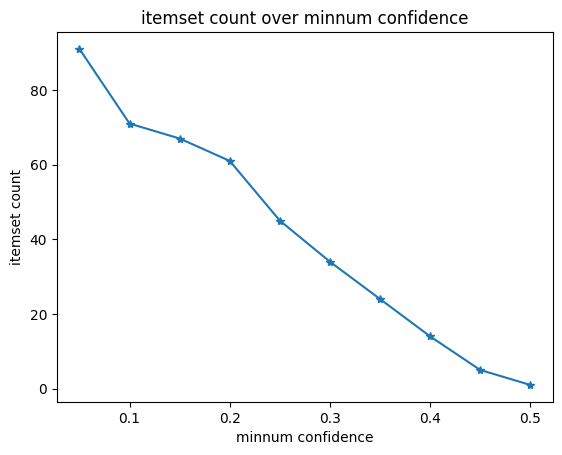

In [29]:
# 최소신뢰도를 0.05~ 0.5 사이의 값으로 변경하며
#       도출되는 규칙의 수를 확인한다.

# 최소신뢰도 후보 범위 지정
min_conf_range =  np.arange(0.05, 0.51, 0.05)

# 최소신뢰도 별 연관규칙 생성 건수 목록
association_rules_count =[ len(list(ap.apriori(grocery_list, min_support= 0.02,
                                               min_confidence=mc)))
                           for mc in min_conf_range ]

# 그래프 출력

plt.plot(min_conf_range, association_rules_count, marker = '*' )
plt.title('itemset count over minnum confidence')
plt.xlabel('minnum confidence')
plt.ylabel('itemset count')
plt.show()

### 최소지지도 0.02 , 최소신뢰도 0.3에서 33건 연관규칙

In [30]:
# 최소지지도 0.02, 최소신뢰도 0.3의 목록을 관찰해보자.

# 연관규칙 생성
rules_lst = list(ap.apriori(grocery_list, min_support= 0.02,
                            min_confidence = 0.3))
# 연관규칙 빈발항목 건수 출력
print('min sup : 0.02,  min conf : 0.3')
print(f'frequent itemset count : {len(rules_lst)}')

# 연관규칙 출력 (항목번호와 함께)
for i, rr in enumerate(rules_lst):
  print(i, end=' : ')
  print_rr(rr)

min sup : 0.02,  min conf : 0.3
frequent itemset count : 34
0 : {'beef'}=>{'whole milk'}, support=0.02,  confidence=0.41, lift=1.59 
1 : {'bottled water'}=>{'whole milk'}, support=0.03,  confidence=0.31, lift=1.22 
2 : {'brown bread'}=>{'whole milk'}, support=0.03,  confidence=0.39, lift=1.52 
3 : {'butter'}=>{'other vegetables'}, support=0.02,  confidence=0.36, lift=1.87 
4 : {'butter'}=>{'whole milk'}, support=0.03,  confidence=0.50, lift=1.95 
5 : {'citrus fruit'}=>{'other vegetables'}, support=0.03,  confidence=0.35, lift=1.80 
6 : {'citrus fruit'}=>{'whole milk'}, support=0.03,  confidence=0.37, lift=1.44 
7 : {'curd'}=>{'whole milk'}, support=0.03,  confidence=0.49, lift=1.92 
8 : {'domestic eggs'}=>{'other vegetables'}, support=0.02,  confidence=0.35, lift=1.81 
9 : {'domestic eggs'}=>{'whole milk'}, support=0.03,  confidence=0.47, lift=1.85 
10 : {'frankfurter'}=>{'whole milk'}, support=0.02,  confidence=0.35, lift=1.36 
11 : {'frozen vegetables'}=>{'whole milk'}, support=0.02,

In [31]:
# 최소지지도 0.02, 최소신뢰도 0.3,  향상도 2 이상의 목록을 관찰

# 리프트 값도 min_lift로 지정하여 연관 규칙 생성
rules_lst = list(ap.apriori(grocery_list, min_support= 0.02,
                            min_confidence = 0.3,
                            min_lift = 2))

# 연관규칙 빈발항목 건수 출력
print('min sup : 0.02,  min conf : 0.3, min lift : 2')
print(f'frequent itemset count : {len(rules_lst)}')

# 연관규칙 출력 (항목번호와 함께)
for i, rr in enumerate(rules_lst):
  print(i, end=' : ')
  print_rr(rr)

min sup : 0.02,  min conf : 0.3, min lift : 2
frequent itemset count : 4
0 : {'root vegetables'}=>{'other vegetables'}, support=0.05,  confidence=0.43, lift=2.25 
1 : {'whipped/sour cream'}=>{'other vegetables'}, support=0.03,  confidence=0.40, lift=2.08 
2 : {'whole milk', 'other vegetables'}=>{'root vegetables'}, support=0.02,  confidence=0.31, lift=2.84 
{'root vegetables', 'whole milk'}=>{'other vegetables'}, support=0.02,  confidence=0.47, lift=2.45 
3 : {'other vegetables', 'yogurt'}=>{'whole milk'}, support=0.02,  confidence=0.51, lift=2.01 
{'whole milk', 'yogurt'}=>{'other vegetables'}, support=0.02,  confidence=0.40, lift=2.05 


### yougurt 관련 연관

In [32]:
# yogurt와 관련된 연관 규칙을 찾아보자.
#     최소 지지도  0.02, 최소 신뢰도 0.3 으로 관찰한다.

# 규칙생성
rules_lst = list(ap.apriori(grocery_list,
                            min_support= 0.02,
                            min_confidence = 0.3))

# yogurt가 포함된 목록만 추출
rules_lst = [ rr for rr in rules_lst if 'yogurt' in rr[0] ]

# 연관규칙 빈발항목 건수 출력
print('min sup : 0.02,  min conf : 0.3, yogurt related only')
print(f'frequent itemset count : {len(rules_lst)}')

# 연관규칙 출력 (항목번호와 함께)
for i, rr in enumerate(rules_lst):
  print(i, end=' : ')
  print_rr(rr)

min sup : 0.02,  min conf : 0.3, yogurt related only
frequent itemset count : 3
0 : {'yogurt'}=>{'other vegetables'}, support=0.04,  confidence=0.31, lift=1.61 
1 : {'yogurt'}=>{'whole milk'}, support=0.06,  confidence=0.40, lift=1.57 
2 : {'other vegetables', 'yogurt'}=>{'whole milk'}, support=0.02,  confidence=0.51, lift=2.01 
{'whole milk', 'yogurt'}=>{'other vegetables'}, support=0.02,  confidence=0.40, lift=2.05 


### 신뢰도 Top3 탐색 @ 최소지지도 0.02

In [34]:
# 최소지지도 0.02 에서 신뢰도가 가장 높은 3개의 규칙을 찾아보자.
# 그래프로 적정 건수가 되는 신뢰도를 추정해보자.

# 규칙생성
rules_lst = list(ap.apriori(grocery_list, min_support=0.02,
                            min_confidence = 0.45))
# 연관규칙 건수 출력
print('min sup : 0.02,  min conf : 0.45')
print(f'rule count : {len(rules_lst)}')

# 연관규칙 출력 (항목번호와 함께)
for i, rr in enumerate(rules_lst):
  print(i, end=' : ')
  print_rr(rr)

min sup : 0.02,  min conf : 0.45
rule count : 5
0 : {'butter'}=>{'whole milk'}, support=0.03,  confidence=0.50, lift=1.95 
1 : {'curd'}=>{'whole milk'}, support=0.03,  confidence=0.49, lift=1.92 
2 : {'domestic eggs'}=>{'whole milk'}, support=0.03,  confidence=0.47, lift=1.85 
3 : {'root vegetables', 'other vegetables'}=>{'whole milk'}, support=0.02,  confidence=0.49, lift=1.91 
{'root vegetables', 'whole milk'}=>{'other vegetables'}, support=0.02,  confidence=0.47, lift=2.45 
4 : {'other vegetables', 'yogurt'}=>{'whole milk'}, support=0.02,  confidence=0.51, lift=2.01 
